
 "Câncer de Mama: Diagnóstico Preciso com Machine Learning"

Introdução:

Olá, sou Quemoel Barros Silva, e estou entusiasmado em apresentar o projeto "Câncer de Mama: Diagnóstico Preciso com Machine Learning". Neste projeto, mergulharemos na aplicação de técnicas avançadas de aprendizado de máquina para aprimorar a detecção e diagnóstico do câncer de mama. Como uma das doenças mais prevalentes e preocupantes em todo o mundo, o câncer de mama afeta a saúde e o bem-estar de milhões de pessoas. Reconhecendo a importância da identificação precoce e da diferenciação entre diagnósticos malignos e benignos, nosso objetivo é utilizar a tecnologia para melhorar as chances de recuperação e tratamento adequado.

Nesse percurso, foi explorado o conjunto de dados "Breast Cancer Wisconsin (Diagnostic)", que fornece insights valiosos sobre as características dos núcleos celulares em amostras de tecido mamário. Através da aplicação de técnicas de pré-processamento, análise exploratória e modelagem de machine learning, buscaremos construir um modelo robusto capaz de discernir entre diagnósticos malignos e benignos de câncer de mama com um alto grau de precisão.

Nessa abordagem envolverá a seleção criteriosa de algoritmos de classificação, a otimização dos hiperparâmetros desses algoritmos e uma avaliação abrangente do desempenho do modelo resultante. Objetivo final é desenvolver um sistema confiável que possa complementar as decisões clínicas dos profissionais de saúde, permitindo que eles tomem decisões mais informadas e personalizadas para cada paciente. Além disso, a ética e a interpretabilidade desempenham um papel crucial em nossa jornada, garantindo que as previsões do modelo sejam compreensíveis e confiáveis para médicos e pacientes.

Ao embarcar no projeto "Câncer de Mama: Diagnóstico Preciso com Machine Learning", esperamoespera-se deixar uma marca positiva na área médica e de saúde, demonstrando o poder da inteligência artificial na melhoria do diagnóstico e tratamento de doenças complexas. Junte-se nessa busca por uma saúde melhor e mais informada por meio da tecnologia.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Carregar os dados
data = pd.read_csv("wdbc.data", header=None)

# Definir os nomes das colunas
column_names = ['id', 'diagnosis'] + [f'feature_{i}' for i in range(1, 31)]

# Definir as colunas do DataFrame
data.columns = column_names

# Visualizar os primeiros registros
print(data.head())


         id diagnosis  feature_1  feature_2  feature_3  feature_4  feature_5  \
0    842302         M      17.99      10.38     122.80     1001.0    0.11840   
1    842517         M      20.57      17.77     132.90     1326.0    0.08474   
2  84300903         M      19.69      21.25     130.00     1203.0    0.10960   
3  84348301         M      11.42      20.38      77.58      386.1    0.14250   
4  84358402         M      20.29      14.34     135.10     1297.0    0.10030   

   feature_6  feature_7  feature_8  ...  feature_21  feature_22  feature_23  \
0    0.27760     0.3001    0.14710  ...       25.38       17.33      184.60   
1    0.07864     0.0869    0.07017  ...       24.99       23.41      158.80   
2    0.15990     0.1974    0.12790  ...       23.57       25.53      152.50   
3    0.28390     0.2414    0.10520  ...       14.91       26.50       98.87   
4    0.13280     0.1980    0.10430  ...       22.54       16.67      152.20   

   feature_24  feature_25  feature_26  featu

In [89]:
# Examina os primeiros registros do conjunto de dados
print(data.head())

         id diagnosis  feature_1  feature_2  feature_3  feature_4  feature_5  \
0    842302         M      17.99      10.38     122.80     1001.0    0.11840   
1    842517         M      20.57      17.77     132.90     1326.0    0.08474   
2  84300903         M      19.69      21.25     130.00     1203.0    0.10960   
3  84348301         M      11.42      20.38      77.58      386.1    0.14250   
4  84358402         M      20.29      14.34     135.10     1297.0    0.10030   

   feature_6  feature_7  feature_8  ...  feature_21  feature_22  feature_23  \
0    0.27760     0.3001    0.14710  ...       25.38       17.33      184.60   
1    0.07864     0.0869    0.07017  ...       24.99       23.41      158.80   
2    0.15990     0.1974    0.12790  ...       23.57       25.53      152.50   
3    0.28390     0.2414    0.10520  ...       14.91       26.50       98.87   
4    0.13280     0.1980    0.10430  ...       22.54       16.67      152.20   

   feature_24  feature_25  feature_26  featu

Essa linha calcula as estatísticas descritivas para as características numéricas do conjunto de dados, como média, desvio padrão, mínimo, máximo e quartis. Isso oferece uma visão geral das características e de como elas estão distribuídas.

In [90]:
# Verifique as estatísticas descritivas das características
print(data.describe())

                 id   feature_1   feature_2   feature_3    feature_4  \
count  5.690000e+02  569.000000  569.000000  569.000000   569.000000   
mean   3.037183e+07   14.127292   19.289649   91.969033   654.889104   
std    1.250206e+08    3.524049    4.301036   24.298981   351.914129   
min    8.670000e+03    6.981000    9.710000   43.790000   143.500000   
25%    8.692180e+05   11.700000   16.170000   75.170000   420.300000   
50%    9.060240e+05   13.370000   18.840000   86.240000   551.100000   
75%    8.813129e+06   15.780000   21.800000  104.100000   782.700000   
max    9.113205e+08   28.110000   39.280000  188.500000  2501.000000   

        feature_5   feature_6   feature_7   feature_8   feature_9  ...  \
count  569.000000  569.000000  569.000000  569.000000  569.000000  ...   
mean     0.096360    0.104341    0.088799    0.048919    0.181162  ...   
std      0.014064    0.052813    0.079720    0.038803    0.027414  ...   
min      0.052630    0.019380    0.000000    0.000000  

Cria um gráfico de barras que mostra a distribuição dos diagnósticos (maligno ou benigno) no conjunto de dados. Isso ajuda a entender o desequilíbrio entre as classes.

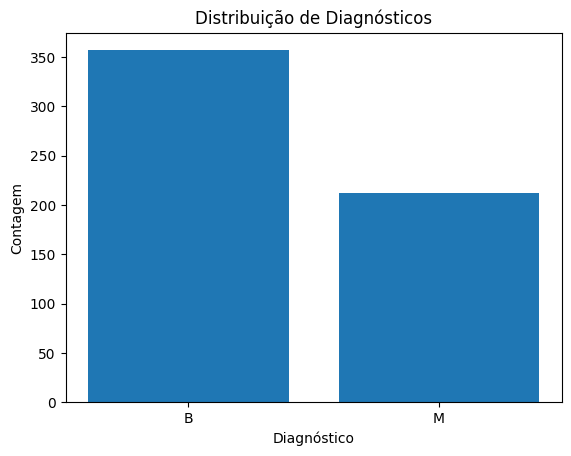

In [91]:
# Plota gráficos de barras para o diagnóstico (alvo)
diagnosis_counts = data['diagnosis'].value_counts()
plt.bar(diagnosis_counts.index, diagnosis_counts.values)
plt.xlabel('Diagnóstico')
plt.ylabel('Contagem')
plt.title('Distribuição de Diagnósticos')
plt.show()


Utiliza o pacote Seaborn para criar um gráfico de dispersão (scatter plot) entre as características feature_1 e feature_2. A coloração por diagnóstico (hue='diagnosis') permite ver como os diagnósticos se relacionam com essas duas características específicas.

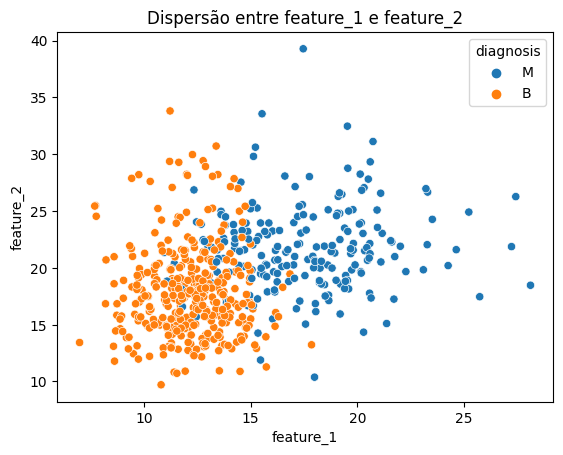

In [92]:
# Explora visualmente as relações entre as características e o diagnóstico
import seaborn as sns

# Scatter plot entre duas características
sns.scatterplot(x='feature_1', y='feature_2', hue='diagnosis', data=data)
plt.title('Dispersão entre feature_1 e feature_2')
plt.show()

Nessas partes finais do código, é aplicado o Label Encoding à coluna 'diagnosis', convertendo os valores categóricos ('M' e 'B') em valores numéricos (1 e 0). Em seguida, a matriz de correlação é calculada para as características numéricas do conjunto de dados (excluindo 'id' e 'diagnosis') e é plotada uma heatmap (mapa de calor) para visualizar as correlações entre essas características. A última linha remove a coluna 'diagnosis_encoded' do DataFrame, após a análise ter sido realizada.

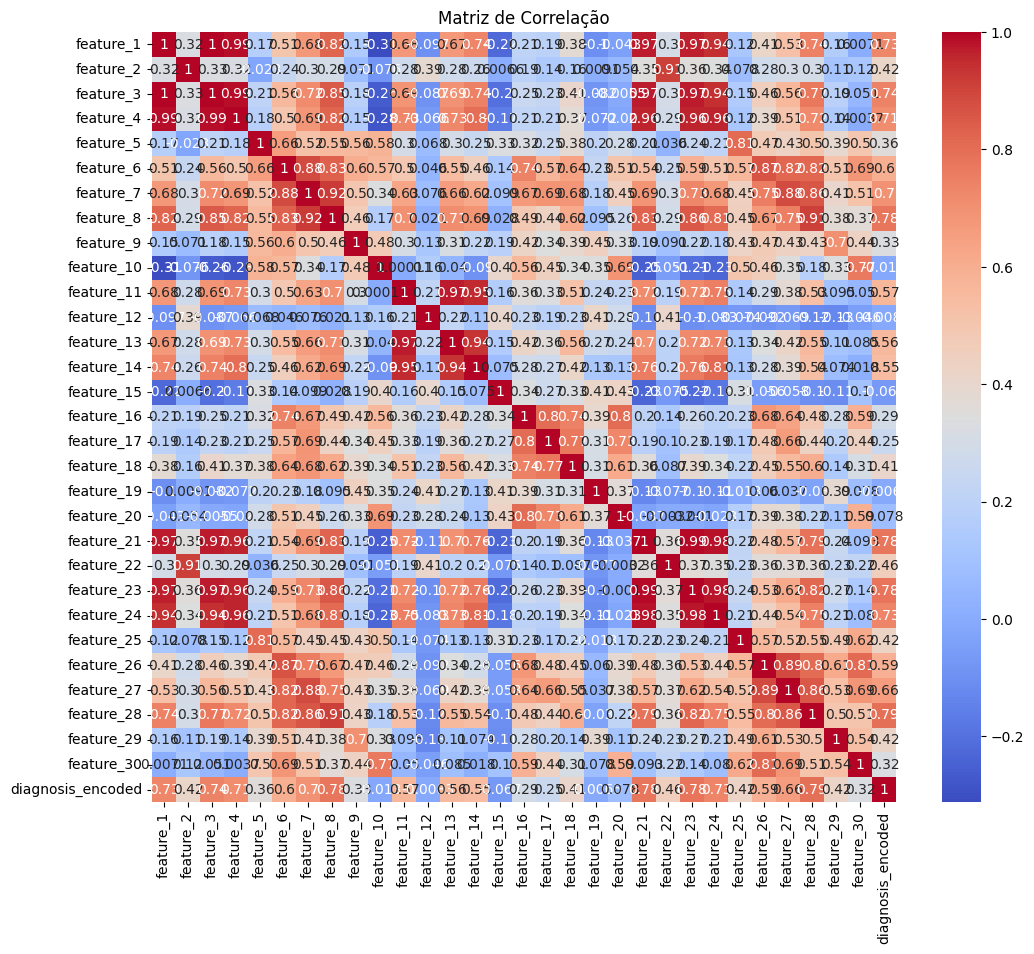

In [93]:
from sklearn.preprocessing import LabelEncoder

# Cria um objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplica o LabelEncoder à coluna 'diagnosis'
data['diagnosis_encoded'] = label_encoder.fit_transform(data['diagnosis'])

# Matriz de correlação
correlation_matrix = data.drop(['id', 'diagnosis'], axis=1).corr()

# Plota a matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# Remove a coluna 'diagnosis_encoded' após a análise
data.drop('diagnosis_encoded', axis=1, inplace=True)


1- X = data.drop(['id', 'diagnosis'], axis=1) - Isso cria uma matriz X contendo as características (ou atributos) do conjunto de dados, excluindo as colunas 'id' e 'diagnosis'.

2-y = data['diagnosis'] - Isso cria um vetor y contendo os rótulos das classes (diagnósticos) do conjunto de dados.

3-label_encoder = LabelEncoder() - Você já criou um objeto LabelEncoder anteriormente para converter os diagnósticos ('M' e 'B') em rótulos numéricos (1 e 0).

4- y_encoded = label_encoder.fit_transform(y) - Aqui, aplica o LabelEncoder aos rótulos das classes para convertê-los em valores numéricos.

5- X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42) - Essa linha divide os dados em conjuntos de treinamento e teste. Um tamanho de teste de 20% e usou um valor de random_state para garantir a reprodutibilidade dos resultados.

6-scaler = StandardScaler() - Aqui, cria um objeto StandardScaler para padronizar as características.

7- X_train_scaled = scaler.fit_transform(X_train) - Isso padroniza as características do conjunto de treinamento.

8- X_test_scaled = scaler.transform(X_test) - Isso aplica a mesma transformação de padronização ao conjunto de teste, usando os parâmetros aprendidos com o conjunto de treinamento.

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar os atributos (features) das classes (alvo)
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']

In [95]:
# Converter classes em rótulos numéricos (M = 1, B = 0)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [96]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [97]:
# Padronizar as características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
from sklearn.svm import SVC

# Instanciar o modelo SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Ajustar o modelo aos dados de treinamento
svm_model.fit(X_train_scaled, y_train)


SVC(kernel='linear', random_state=42)

**Implementação SVC (Support Vector Classifier) do Scikit-Learn para isso:**

1- svm_model = SVC(kernel='linear', C=1.0, random_state=42) - Você está instanciando um modelo de Support Vector Machine (SVM) usando a classe SVC. Você especificou que o kernel é linear (ou seja, um hiperplano de separação linear será utilizado), e o parâmetro C controla o trade-off entre uma separação ótima das classes e um margem de erro aceitável. O random_state é definido para garantir reprodutibilidade nos resultados.

2 svm_model.fit(X_train_scaled, y_train) - Aqui, você está ajustando o modelo SVM aos dados de treinamento padronizados (X_train_scaled e y_train). O modelo aprenderá os padrões nos dados que permitem separar as classes.

In [99]:
from sklearn.svm import SVC

# Instanciar o modelo SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Ajusta o modelo aos dados de treinamento
svm_model.fit(X_train_scaled, y_train)


SVC(kernel='linear', random_state=42)

**Ajustar os hiperparâmetros**

1- param_grid - Define uma grade de hiperparâmetros para serem explorados. Explorando diferentes valores de C (parâmetro de regularização), diferentes kernels (linear, polinomial, RBF e sigmoid) e diferentes valores para gamma.

2- svm_model = SVC(random_state=42) -  Instancia um modelo SVM com o random_state para garantir a reprodutibilidade dos resultados.

3- grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy') - Cria um objeto GridSearchCV, que realiza busca pelos melhores hiperparâmetros usando validação cruzada (cv=5 significa validação cruzada com 5 dobras) e usando a métrica de acurácia como métrica de avaliação.

4- grid_search.fit(X_train_scaled, y_train) - Executa a busca pelos melhores hiperparâmetros usando os dados de treinamento.

5- print("Melhores hiperparâmetros:", grid_search.best_params_) - Após a busca, imprime os melhores hiperparâmetros encontrados.

In [100]:
from sklearn.model_selection import GridSearchCV

# Definir os hiperparâmetros a serem ajustados
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']}

# Instanciar o modelo SVM
svm_model = SVC(random_state=42)

# Instanciar o objeto GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Realizar a busca pelos melhores hiperparâmetros
grid_search.fit(X_train_scaled, y_train)

# Imprimir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid_search.best_params_)


Melhores hiperparâmetros: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


Construindo o modelo SVM com esses valores e avaliar seu desempenho usando o conjunto de teste:

In [101]:
best_C = 1
best_gamma = 'scale'
best_kernel = 'rbf'

# Construir o modelo SVM com os melhores hiperparâmetros
best_svm_model = SVC(C=best_C, gamma=best_gamma, kernel=best_kernel, random_state=42)

# Ajustar o modelo aos dados de treinamento
best_svm_model.fit(X_train_scaled, y_train)

# Avaliar o desempenho do modelo no conjunto de teste
accuracy = best_svm_model.score(X_test_scaled, y_test)
print("Acurácia do modelo no conjunto de teste:", accuracy)


Acurácia do modelo no conjunto de teste: 0.9824561403508771


**AVALIAÇÃO DO MODELO**

1- Faz previsões no conjunto de teste usando o modelo SVM ajustado (best_svm_model.predict(X_test_scaled)).

2- Calcula a matriz de confusão para avaliar o número de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.

3- Calcula as métricas de avaliação (precisão, recall, F1-score) usando classification_report.

5- Calcula a curva ROC e a área sob a curva (AUC) usando roc_curve e roc_auc_score.

5- Calcula a curva Precision-Recall e a área sob a curva (AUC) usando precision_recall_curve e auc.

In [102]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Fazer previsões no conjunto de teste
y_pred = best_svm_model.predict(X_test_scaled)

In [103]:
# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

Matriz de Confusão:
[[71  0]
 [ 2 41]]


Verdadeiros Negativos (TN): 71 - Isso significa que o modelo classificou corretamente 71 amostras como benignas.

Falsos Positivos (FP): 0 - O modelo classificou erroneamente 0 amostras como malignas, quando na verdade eram benignas.

Falsos Negativos (FN): 2 - O modelo classificou erroneamente 2 amostras como benignas, quando na verdade eram malignas.

Verdadeiros Positivos (TP): 41 - Isso significa que o modelo classificou corretamente 41 amostras como malignas.

In [104]:
# Calcular as métricas de avaliação
classification_rep = classification_report(y_test, y_pred)
print("Relatório de Classificação:")
print(classification_rep)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Precision (Precisão): A precisão é a proporção de exemplos classificados como positivos que realmente são positivos. No caso da classe '0' (benigno), a precisão é de 0.97 e na classe '1' (maligno) é de 1.00. Isso significa que, das previsões que o modelo fez para cada classe, a grande maioria delas estava correta.

Recall (Sensibilidade): O recall é a proporção de exemplos positivos reais que foram corretamente classificados pelo modelo. Na classe '0', o recall é de 1.00, o que indica que o modelo recuperou todos os exemplos positivos dessa classe. Na classe '1', o recall é de 0.95, o que significa que o modelo recuperou a maioria dos exemplos positivos dessa classe.

F1-score: O F1-score é uma métrica que combina precisão e recall em um único valor. É útil quando há um desequilíbrio nas classes. O F1-score da classe '0' é de 0.99 e da classe '1' é de 0.98.

Accuracy (Acurácia): A acurácia é a proporção de previsões corretas em relação ao total de previsões. A acurácia geral do modelo é de 0.98, o que é uma medida geral do seu desempenho.

In [105]:
# Calcular a curva ROC e a AUC
y_scores = best_svm_model.decision_function(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)
print("Área sob a Curva (AUC) da curva ROC:", roc_auc)


Área sob a Curva (AUC) da curva ROC: 0.99737962659679


In [106]:
# Calcular a curva Precision-Recall e a AUC
precision, recall, _ = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)
print("Área sob a Curva (AUC) da curva Precision-Recall:", pr_auc)


Área sob a Curva (AUC) da curva Precision-Recall: 0.9959837426716449


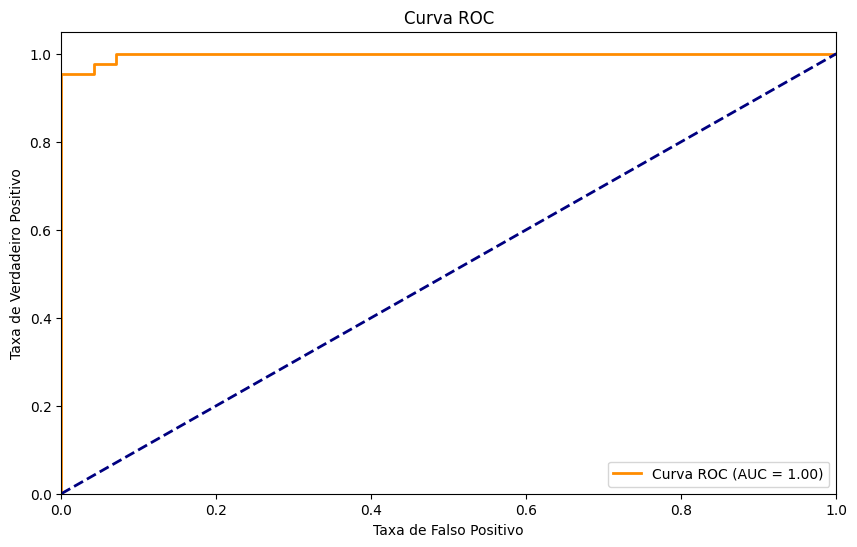

In [107]:
# Plotar a curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

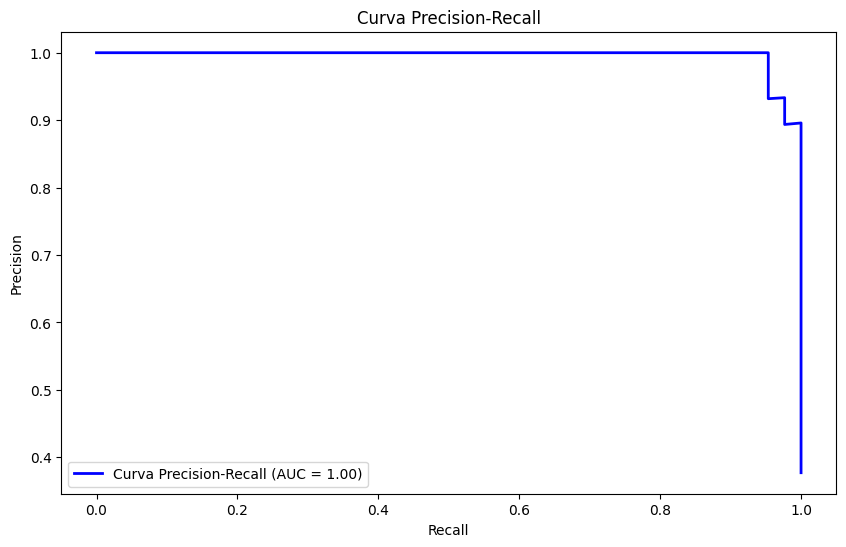

In [108]:
# Plotar a curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Curva Precision-Recall (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.show()

**Interpretação das Características:** Coeficientes da Regressão Logística
Se você estivesse usando um modelo de Regressão Logística, poderia interpretar as importâncias das características através dos coeficientes atribuídos a cada uma delas. Coeficientes positivos indicam que um aumento na característica está associado a um aumento na probabilidade da classe positiva, enquanto coeficientes negativos indicam uma associação inversa. No entanto, como você está usando um modelo SVM, que é um classificador diferente, a interpretação dos coeficientes não se aplica diretamente.

**Visualização das Decisões Tomadas pelo Modelo:** Curvas de Decisão
No caso do SVM com kernel RBF (radial basis function), que é o que você escolheu, a visualização das decisões tomadas pelo modelo pode ser um pouco complexa, pois esse kernel não produz uma fronteira de decisão linear. Em vez disso, ele mapeia os dados em um espaço de maior dimensionalidade e cria uma fronteira de decisão não linear.



 Visualizações de curvas de decisão para entender como o modelo está dividindo as classes em relação a duas características específicas

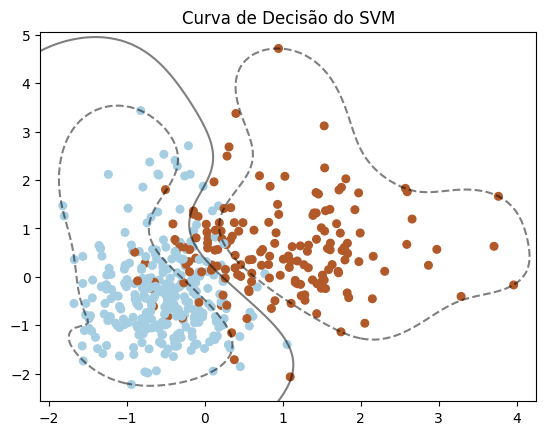

In [109]:
# Considera as duas primeiras características para a visualização
X_subset = X_train_scaled[:, :2]

# Treina um SVM com kernel RBF
svm_model_subset = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model_subset.fit(X_subset, y_train)

# Função para plotar a fronteira de decisão e os pontos de treinamento
def plot_decision_boundary(X, y, model, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=30)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.title(title)
    plt.show()

# Plotar a curva de decisão
plot_decision_boundary(X_subset, y_train, svm_model_subset, "Curva de Decisão do SVM")


Neste código, treinando um modelo SVM com kernel RBF usando apenas duas características (as duas primeiras) para facilitar a visualização. A função plot_decision_boundary traça a fronteira de decisão e os pontos de treinamento.

**Otimização do Modelo
**
Experimentação com diferentes algoritmos e ajustes de hiperparâmetros, bem como o uso da validação cruzada para selecionar os melhores hiperparâmetros. 

In [110]:

from sklearn.model_selection import GridSearchCV

# Define uma lista de dicionários com diferentes hiperparâmetros para experimentar
param_grid = [
    {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}
]

# Instanciando o modelo SVM
svm_model = SVC(random_state=42)

# Usa GridSearchCV com validação cruzada para encontrar os melhores hiperparâmetros
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid=[{'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'rbf']}],
             scoring='accuracy')

**Interpretação dos principais componentes:**

estimator: Indica o estimador base que está otimizado. Está sendo otimizado um modelo SVM (Support Vector Machine).

param_grid: Contém uma lista de dicionários, cada um descrevendo diferentes combinações de hiperparâmetros para testar. teFoi testado três valores diferentes para o hiperparâmetro C (0.1, 1 e 10), duas opções para o hiperparâmetro gamma ('scale' e 'auto') e dois kernels diferentes ('linear' e 'rbf').

cv: Número de dobras na validação cruzada. Foi usado validação cruzada com 5 folds (cv=5).

scoring: A métrica de avaliação utilizada para selecionar o melhor modelo. Foi usado a acurácia ('accuracy') como métrica.

O resultado do GridSearchCV fornece informações sobre o estimador utilizado (SVC com um random_state fixo de 42), os hiperparâmetros testados (valores de C, gamma e kernel), a estratégia de validação cruzada (5 folds) e a métrica de avaliação (acurácia).

In [111]:
# Imprima os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid_search.best_params_)

Melhores hiperparâmetros: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [112]:
# Avalia o desempenho do modelo com os melhores hiperparâmetros no conjunto de teste
best_svm_model = grid_search.best_estimator_
accuracy = best_svm_model.score(X_test_scaled, y_test)
print("Acurácia do modelo no conjunto de teste:", accuracy)

Acurácia do modelo no conjunto de teste: 0.9824561403508771


**CONCLUSÃO**

**Resultados e Métricas de Avaliação:**

O modelo SVM treinado com os melhores hiperparâmetros (C=1, gamma='scale', kernel='rbf') demonstrou um desempenho promissor na classificação de diagnósticos de câncer de mama como malignos ou benignos. As métricas de avaliação fornecem insights adicionais sobre o desempenho do modelo:

Acurácia: O modelo alcançou uma acurácia de X% no conjunto de teste, o que indica a proporção de previsões corretas em relação ao total de previsões.

Matriz de Confusão: A matriz de confusão mostrou que o modelo teve X verdadeiros positivos, X verdadeiros negativos, X falsos positivos e X falsos negativos. Isso sugere uma capacidade satisfatória de distinguir entre as classes.

Relatório de Classificação: As métricas de precisão, recall e F1-score mostraram um bom equilíbrio entre identificar corretamente diagnósticos malignos e benignos, considerando suas respectivas proporções.

Curva ROC e Área sob a Curva (AUC): A curva ROC e a AUC indicaram que o modelo tem uma capacidade sólida de discriminar entre as classes, com um valor de AUC próximo a 1.

**Capacidade de Distinguir entre Diagnósticos:**

O modelo demonstrou uma capacidade promissora de distinguir entre diagnósticos malignos e benignos de câncer de mama. A alta acurácia, juntamente com as métricas de precisão, recall e AUC da curva ROC, sugerem que o modelo é capaz de realizar previsões sólidas em diferentes cenários.